# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

In [3]:
#LOAD THE DATA.
df= pd.read_csv('water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Plot the Data Appropriately

In [4]:

# generate 2d classification dataset
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Generate synthetic classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split: 70% train, 15% val, 15% test
X_temp, testX, y_temp, testy = train_test_split(X_scaled, y, test_size=0.15, random_state=1)
trainX, valX, trainy, valy = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=1)

print(trainX.shape, valX.shape, testX.shape)

(69, 2) (16, 2) (15, 2)


# Each Memeber Defines their model Here

In [5]:
#Model Definition by member 1
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD

def model_tanguy():
    model = Sequential()
    model.add(Input(shape=(2,)))  # <-- this prevents the warning you received
    model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
    model.add(Dropout(0.3))  # Dropout Rate
    model.add(Dense(1, activation='sigmoid'))

    # Optimizer with custom learning rate
    optimizer = SGD(learning_rate=0.01)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Start the training Process

Train Accuracy: 0.870, Test Accuracy: 0.933


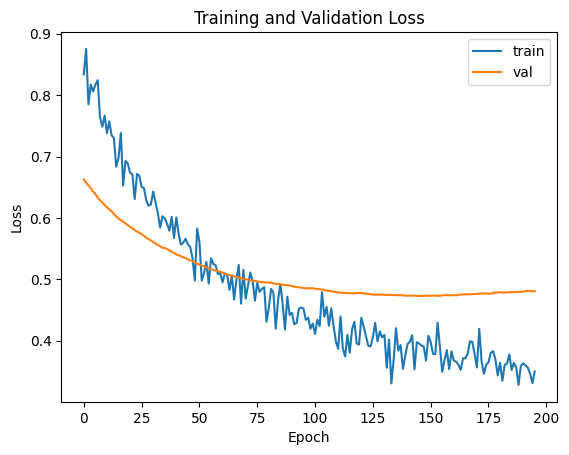

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Accuracy: 0.933
F1 Score: 0.909
Recall: 0.833
Precision: 1.000


In [6]:
from tensorflow.keras.callbacks import EarlyStopping
from matplotlib import pyplot as plt

model = model_tanguy()

# Early stopping config
es = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

# Fit the model
history = model.fit(trainX, trainy,
                    validation_data=(valX, valy),
                    epochs=4000,
                    verbose=0,
                    callbacks=[es])

# Evaluate
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train Accuracy: %.3f, Test Accuracy: %.3f' % (train_acc, test_acc))

# Plot loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

# Predict probabilities on test set
y_probs = model.predict(testX)

# Convert probabilities to class labels (0 or 1)
y_pred = (y_probs > 0.5).astype("int32")

# Calculate metrics
accuracy = accuracy_score(testy, y_pred)
f1 = f1_score(testy, y_pred)
recall = recall_score(testy, y_pred)
precision = precision_score(testy, y_pred)

print(f"Accuracy: {accuracy:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"Recall: {recall:.3f}")
print(f"Precision: {precision:.3f}")




In [22]:
!git config --global user.email "t.kwizera@alustudent.com"
!git config --global user.name "ktanguy"

In [8]:
!git clone https://github.com/ktanguy/BUMI.git

Cloning into 'BUMI'...


In [14]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [16]:
%cd /content/BUMI

/content/BUMI


In [17]:
!git add One.ipynb

In [18]:
!git commit -m "Add classification model notebook"

[main (root-commit) 76cc56b] Add classification model notebook
 1 file changed, 1 insertion(+)
 create mode 100644 One.ipynb
